In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.font_manager as fm
import os
import re
import scipy.stats as sp
fpath = '/Library/Fonts/Myriad-Pro_31655.ttf'
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
axis_font = {'fontname':fname, 'fontproperties':prop}

# Part 1: Load in data

In [2]:
in_dir_for_on = 'data_ablation_cross_vals/*_cv_scores_on.csv'
in_dir_for_off = 'data_ablation_cross_vals/*cv_scores_off.csv'

metric_names = ['r2_score', 'pearson_corr', 'spearman_corr', 'mse_val', 'mae_val']

#on values
filenames = glob(in_dir_for_on)
column_list_on = []
column_list_on_scram = []
for f in filenames:
    curr_df = pd.read_csv(f, header=None)
    curr_df.columns = metric_names
    curr_column = curr_df['spearman_corr']
    curr_column = pd.DataFrame(curr_column)
    p = re.compile('(?<=/).*?(?=_cv)')
    curr_name = p.findall(f)[0]
    curr_column.columns = [curr_name]
    if 'scramble' in curr_name:
        column_list_on_scram.append(curr_column)
    else:
        column_list_on.append(curr_column)
    
#off values   
filenames = glob(in_dir_for_off)
column_list_off = []
column_list_off_scram = []
for f in filenames:
    curr_df = pd.read_csv(f, header=None)
    curr_df.columns = metric_names
    curr_column = curr_df['r2_score']
    curr_column = pd.DataFrame(curr_column)
    p = re.compile('(?<=/).*?(?=_cv)')
    curr_name = p.findall(f)[0]
    curr_column.columns = [curr_name]
    if 'scramble' in curr_name:
        column_list_off_scram.append(curr_column)
    else:
        column_list_off.append(curr_column)

In [3]:
on_scram = pd.concat(column_list_on_scram, axis = 1)
p = re.compile('.+?(?=_scramble)')
on_scram.columns = [p.findall(x)[0] for x in on_scram.columns]
on_scram.to_csv('cleaned_csvs/on_value_predictions_with_scrambled_toeholds.csv')

In [4]:
on_model = pd.concat(column_list_on, axis = 1)
on_model
on_model.to_csv('cleaned_csvs/on_value_predictions_with_regular_toeholds.csv')

In [5]:
off_scram = pd.concat(column_list_off_scram, axis = 1)
p = re.compile('.+?(?=_scramble)')
off_scram.columns = [p.findall(x)[0] for x in off_scram.columns]
off_scram
off_scram.to_csv('cleaned_csvs/off_value_predictions_with_scrambled_toeholds.csv')

In [6]:
off_model = pd.concat(column_list_off, axis = 1)
off_model
off_model.to_csv('cleaned_csvs/off_value_predictions_with_regular_toeholds.csv')

# Part 2: Prep data for plotting

In [7]:
# reorder each df so numbers in order
dataset_sizes = [368, 736, 3678, 7356, 18389, 36778, 55167, 73556]
string_sizes = [str(x) for x in dataset_sizes]

on_model = on_model[string_sizes]
on_scram = on_scram[string_sizes]
off_model = off_model[string_sizes]
off_scram = off_scram[string_sizes]

In [8]:
def get_means_and_sems(df):
    means = []
    sems = []
    for column in df:
        col = df[column]
        mean = np.average(col)
        sem = sp.sem(col)
        means.append(mean)
        sems.append(sem)
    return means, sems

on_means, on_sems = get_means_and_sems(on_model)
on_scram_means, on_scram_sems = get_means_and_sems(on_scram)
off_means, off_sems = get_means_and_sems(off_model)
off_scram_means, off_scram_sems = get_means_and_sems(off_scram)

# Part 3: Make plots

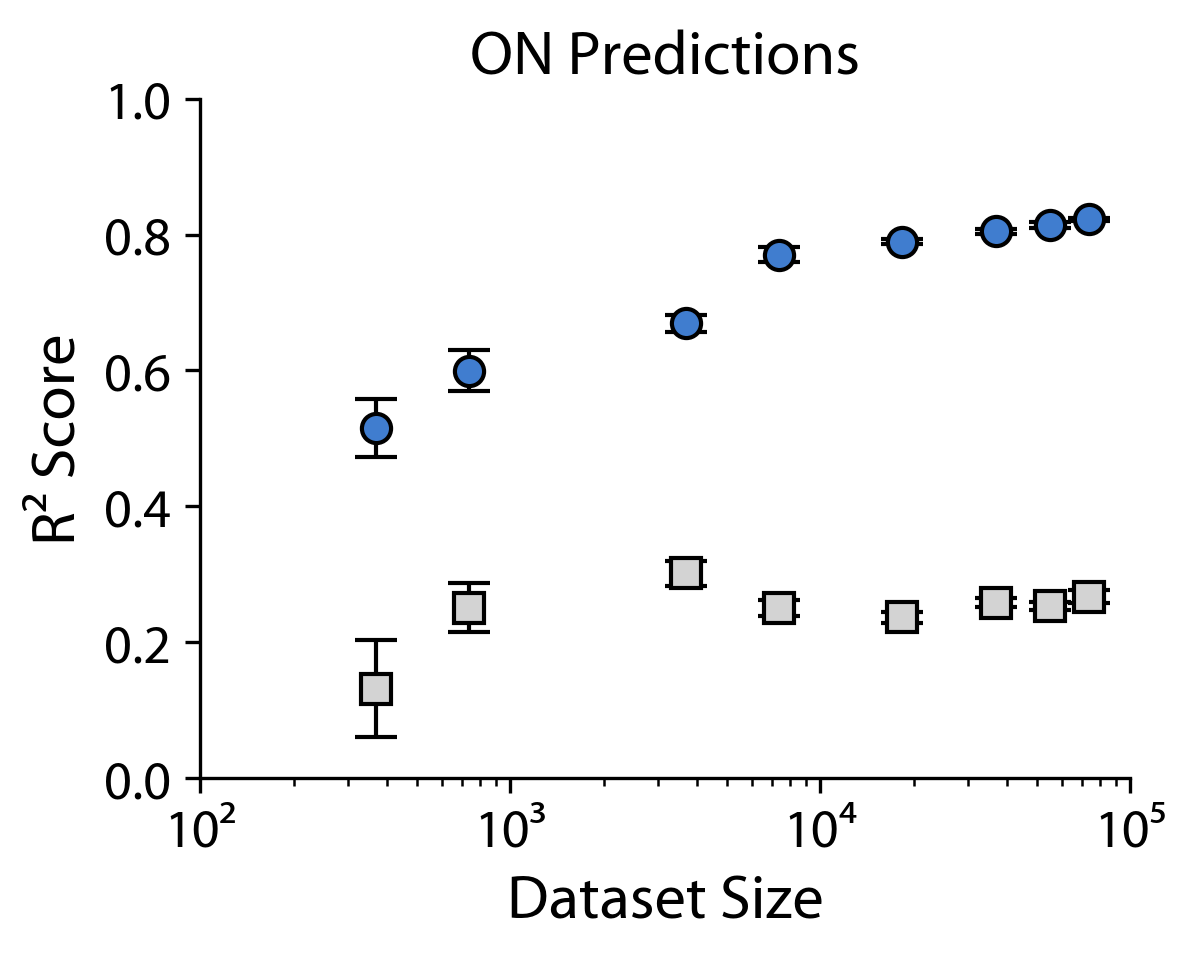

In [9]:
x = list(range(0, len(dataset_sizes)))

blue = '#407DCF'
grey = 'lightgray'

fig, ax = plt.subplots(figsize = (4,3), dpi = 300)
# add real
plt.errorbar(dataset_sizes, on_means, yerr = on_sems, marker = 'o', alpha = 1, ecolor = 'black',
             capsize=5, linestyle = '', linewidth=1, markeredgecolor = 'black', markersize = 7, color = blue)

# add scram
plt.errorbar(dataset_sizes, on_scram_means, yerr = on_scram_sems, marker = 's', alpha = 1, ecolor = 'black',
             capsize=5, linestyle = '', linewidth=1, markeredgecolor = 'black', markersize = 7, color = grey)

ax.set_xscale("log")
on_yticks = [np.round(x, 2) for x in ax.get_yticks()]
ax.set_yticks(on_yticks)
ax.set_yticklabels(on_yticks, **axis_font, fontsize = 13)
ax.set_ylabel('R\u00b2 Score', **axis_font, fontsize = 15)
xaxis_ticks = [100, 1000, 10000, 100000]

ax.set_xticks(xaxis_ticks)
ax.set_xticklabels(['10\u00b2', '10\u00b3', '10\u2074', '10\u2075'], rotation = 0, **axis_font, fontsize = 13)
ax.set_xlabel('Dataset Size', **axis_font, fontsize = 15)
ax.set_title('ON Predictions', **axis_font, fontsize = 15)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

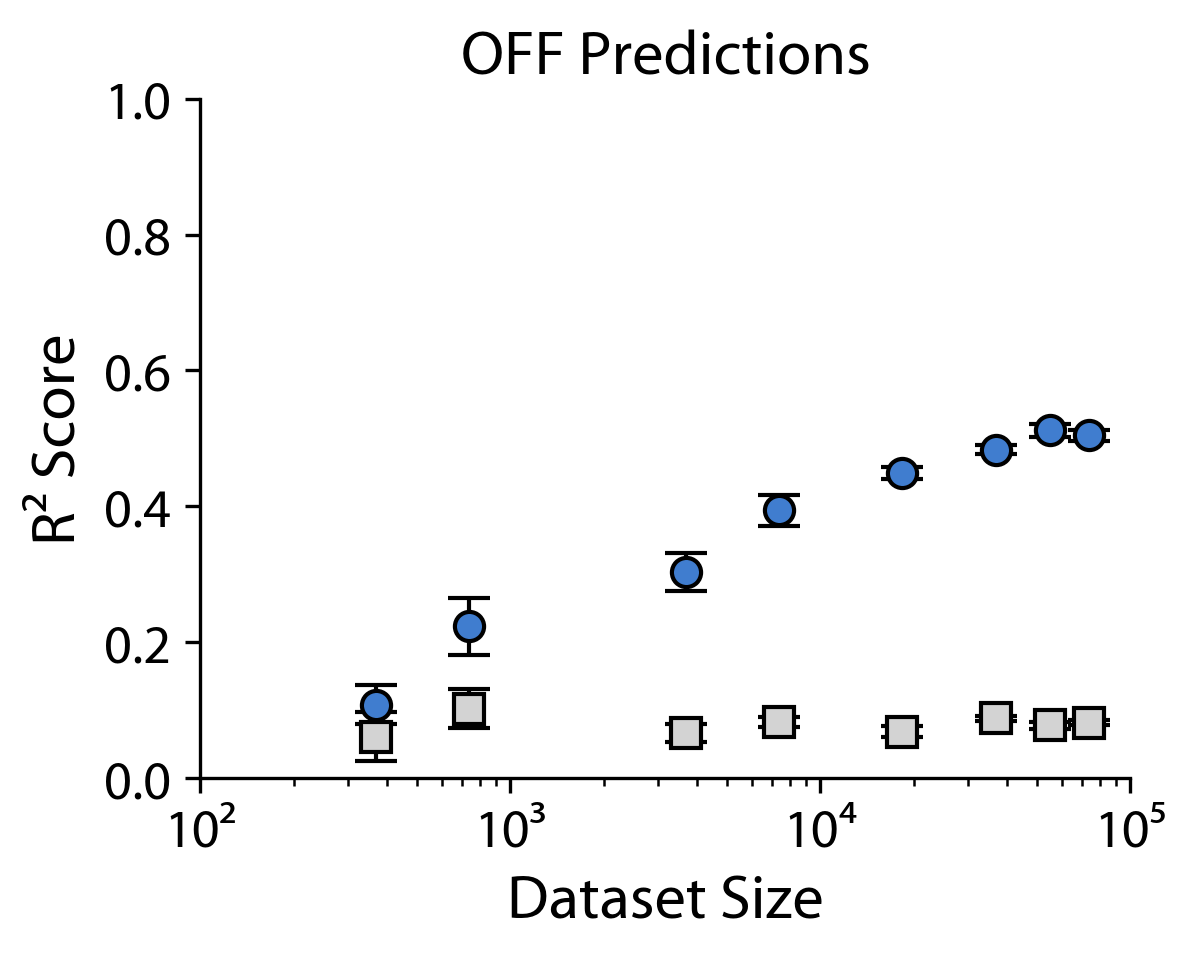

In [10]:
x = list(range(0, len(dataset_sizes)))

fig, ax = plt.subplots(figsize = (4,3), dpi = 300)
# add real
plt.errorbar(dataset_sizes, off_means, yerr = off_sems, marker = 'o', alpha = 1, ecolor = 'black',
             capsize=5, linestyle = '', linewidth=1, markeredgecolor = 'black', markersize = 7, color = blue)

# add scram
plt.errorbar(dataset_sizes, off_scram_means, yerr = off_scram_sems, marker = 's', alpha = 1, ecolor = 'black',
             capsize=5, linestyle = '', linewidth=1, markeredgecolor = 'black', markersize = 7, color = grey)

ax.set_xscale("log")
ax.set_yticks(on_yticks)
ax.set_yticklabels(on_yticks, **axis_font, fontsize = 13)
ax.set_ylabel('R\u00b2 Score', **axis_font, fontsize = 15)
xaxis_ticks = [100, 1000, 10000, 100000]

ax.set_xticks(xaxis_ticks)
ax.set_xticklabels(['10\u00b2', '10\u00b3', '10\u2074', '10\u2075'], rotation = 0, **axis_font, fontsize = 13)
ax.set_xlabel('Dataset Size', **axis_font, fontsize = 15)
ax.set_title('OFF Predictions', **axis_font, fontsize = 15)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()